In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('default of credit card clients.csv')

# Display the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   GENDER                      30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [3]:
df.head()


,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,2,46,8,7,6,5,4,...,19617,18737,18148,0,0,0,0,0,0,0
1,50000,2,2,2,25,8,7,6,5,4,...,36374,35229,34365,0,0,1000,0,0,3000,1
2,20000,2,3,1,24,8,7,6,5,4,...,22719,21796,21162,0,0,0,0,0,0,0
3,30000,1,2,2,29,8,7,6,5,4,...,32391,31332,30558,0,0,0,0,0,0,0
4,20000,1,2,2,24,8,7,6,5,4,...,22757,21834,21200,0,0,0,0,0,0,0


In [4]:
df = df.dropna()

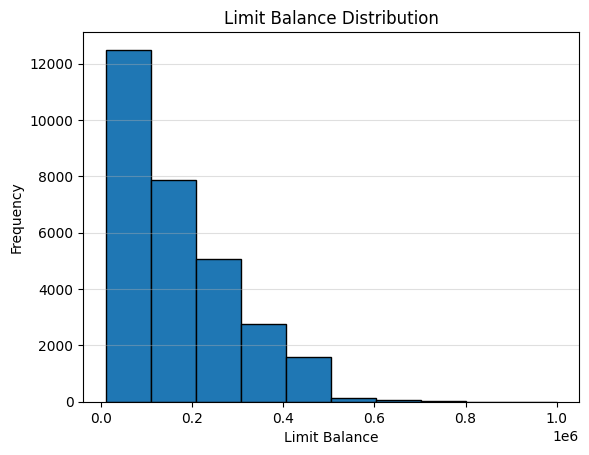

In [5]:
df['LIMIT_BAL'] = df['LIMIT_BAL'].astype('category')

# Display the distribution of Limit Balance
plt.hist(df['LIMIT_BAL'] ,edgecolor='black')
plt.title('Limit Balance Distribution')
plt.xlabel('Limit Balance')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.4)
plt.show()

In [6]:
df["default payment next month"].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [26]:
X = df.iloc[:,0:22]
y = df.iloc[:, 23]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

model = DecisionTreeClassifier(random_state=100,criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [31]:
print(model.classes_)

[0 1]


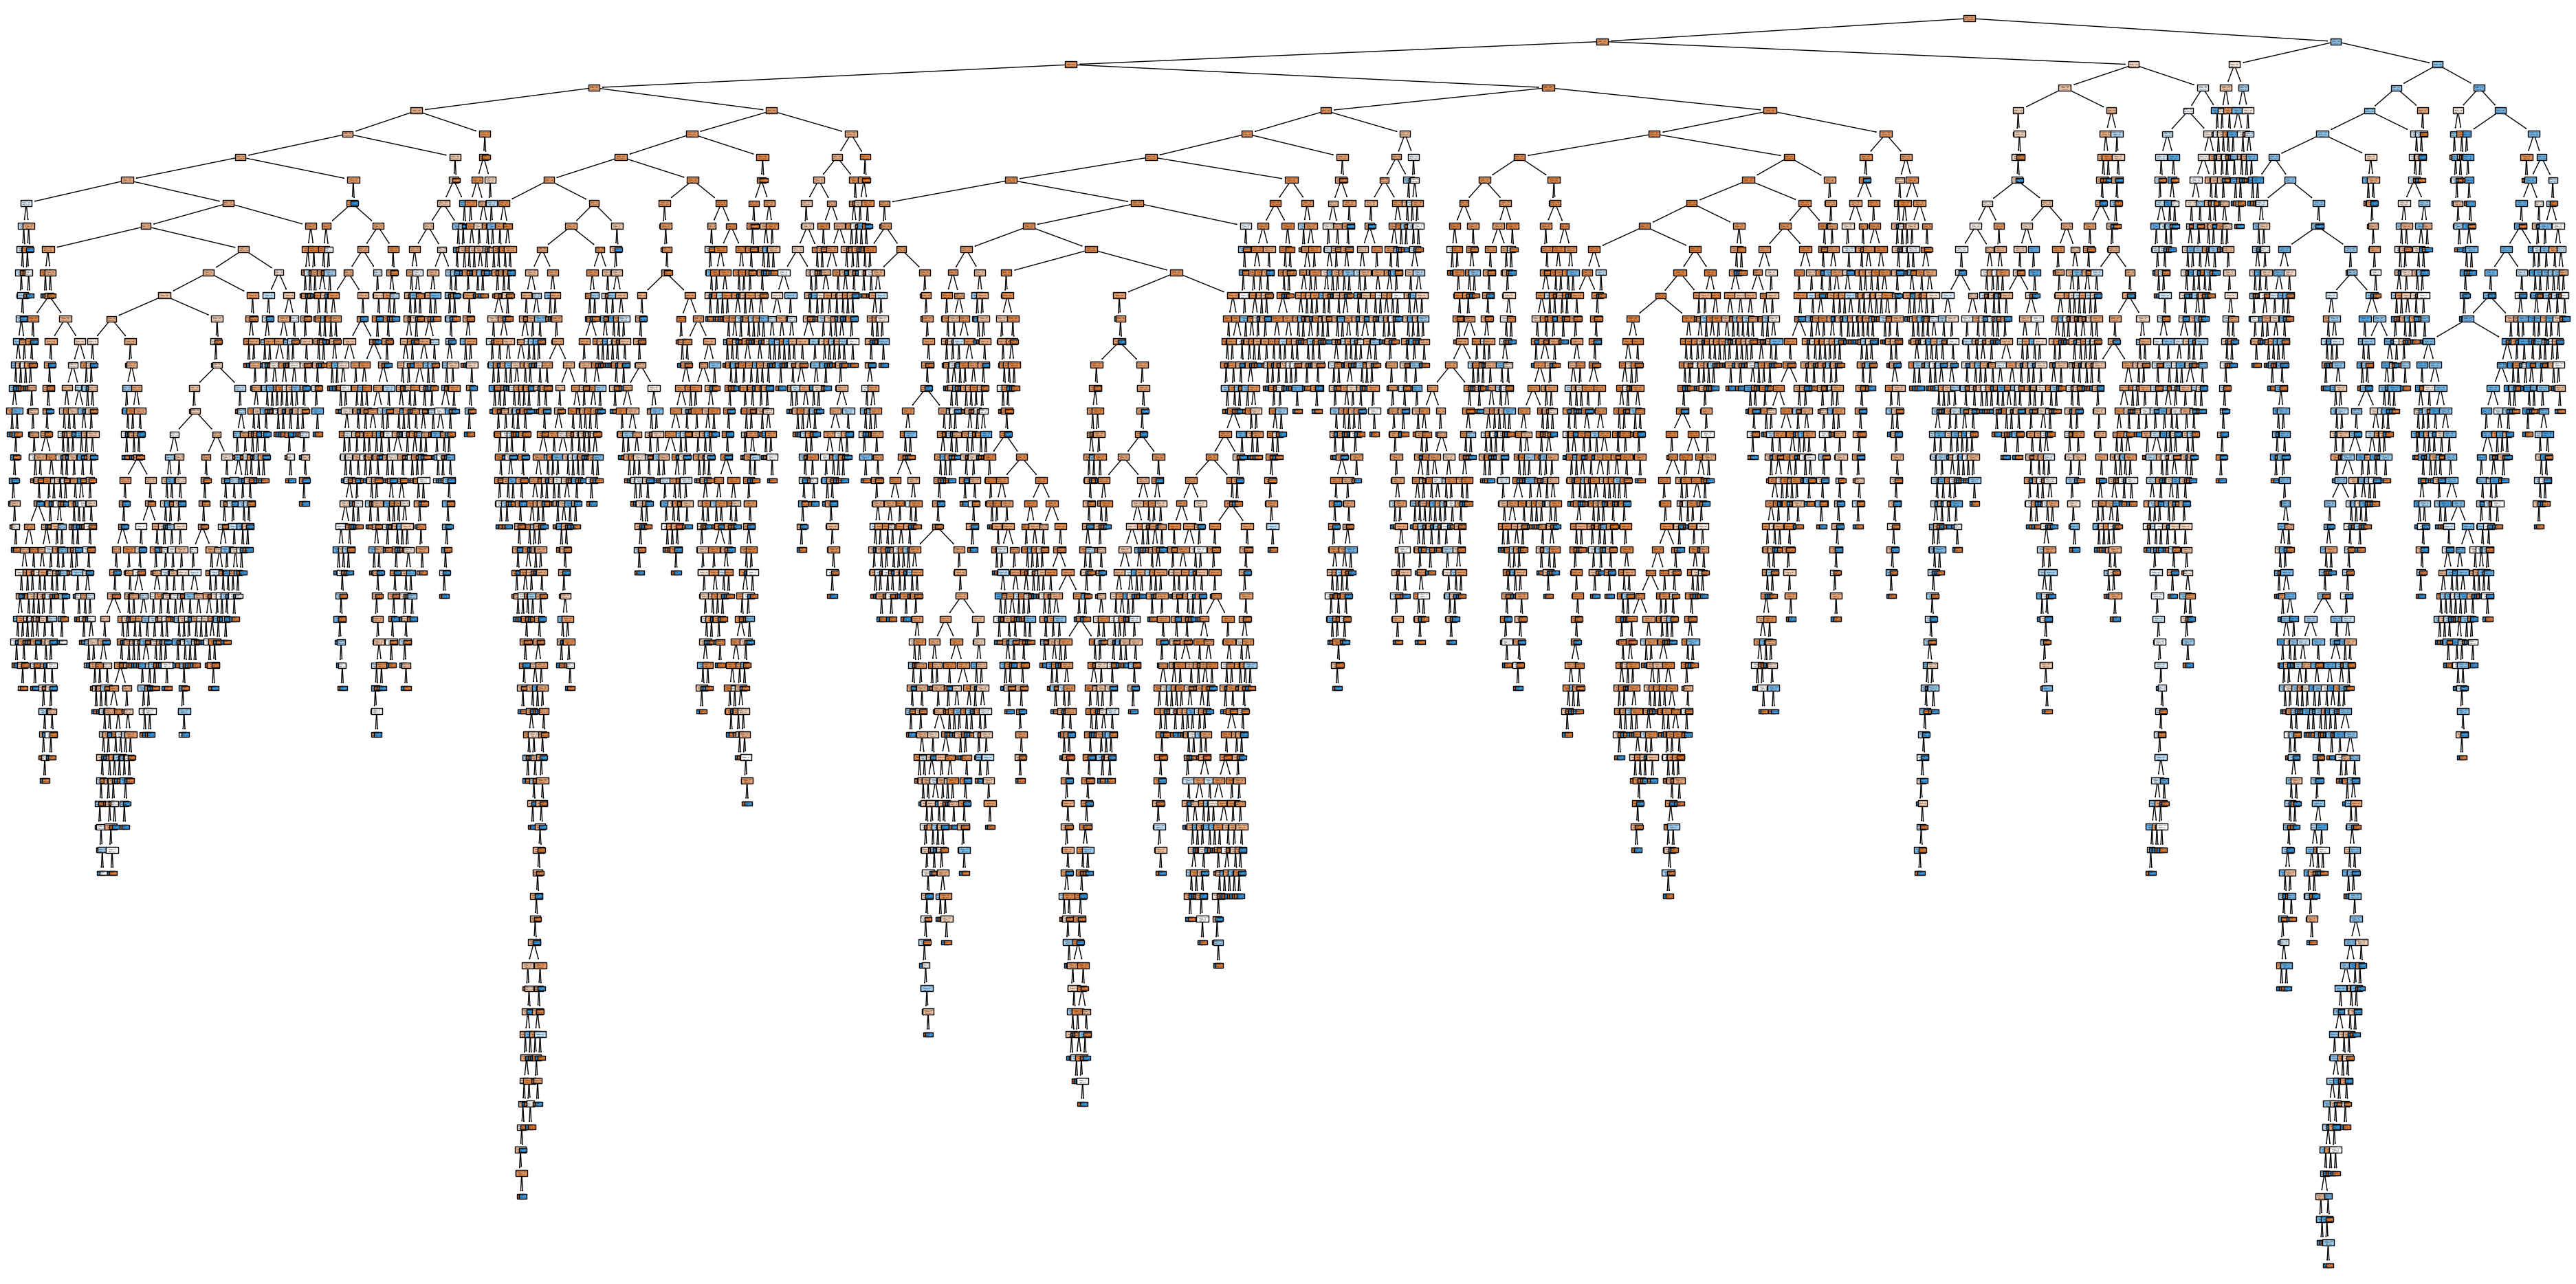

In [32]:
plt.figure(figsize=(48,24))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [33]:
print("Number of rows in training data:", len(X_train))
print("Number of rows in test data:", len(X_test))

Number of rows in training data: 24000
Number of rows in test data: 6000


In [34]:
## Set constraints when creating the tree
pruned_tree = DecisionTreeClassifier(
    random_state=100,
    criterion='entropy',
    #max_depth=5,                  # Limit the depth of the tree
    #min_samples_split=5,           # Min samples required to split a node
    #min_samples_leaf=5,           # Min samples required in a leaf node
    #max_leaf_nodes=20,            # Max number of leaf nodes
    min_impurity_decrease=0.01     # Min impurity decrease required for splitting
)

pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.01,
                       random_state=100)

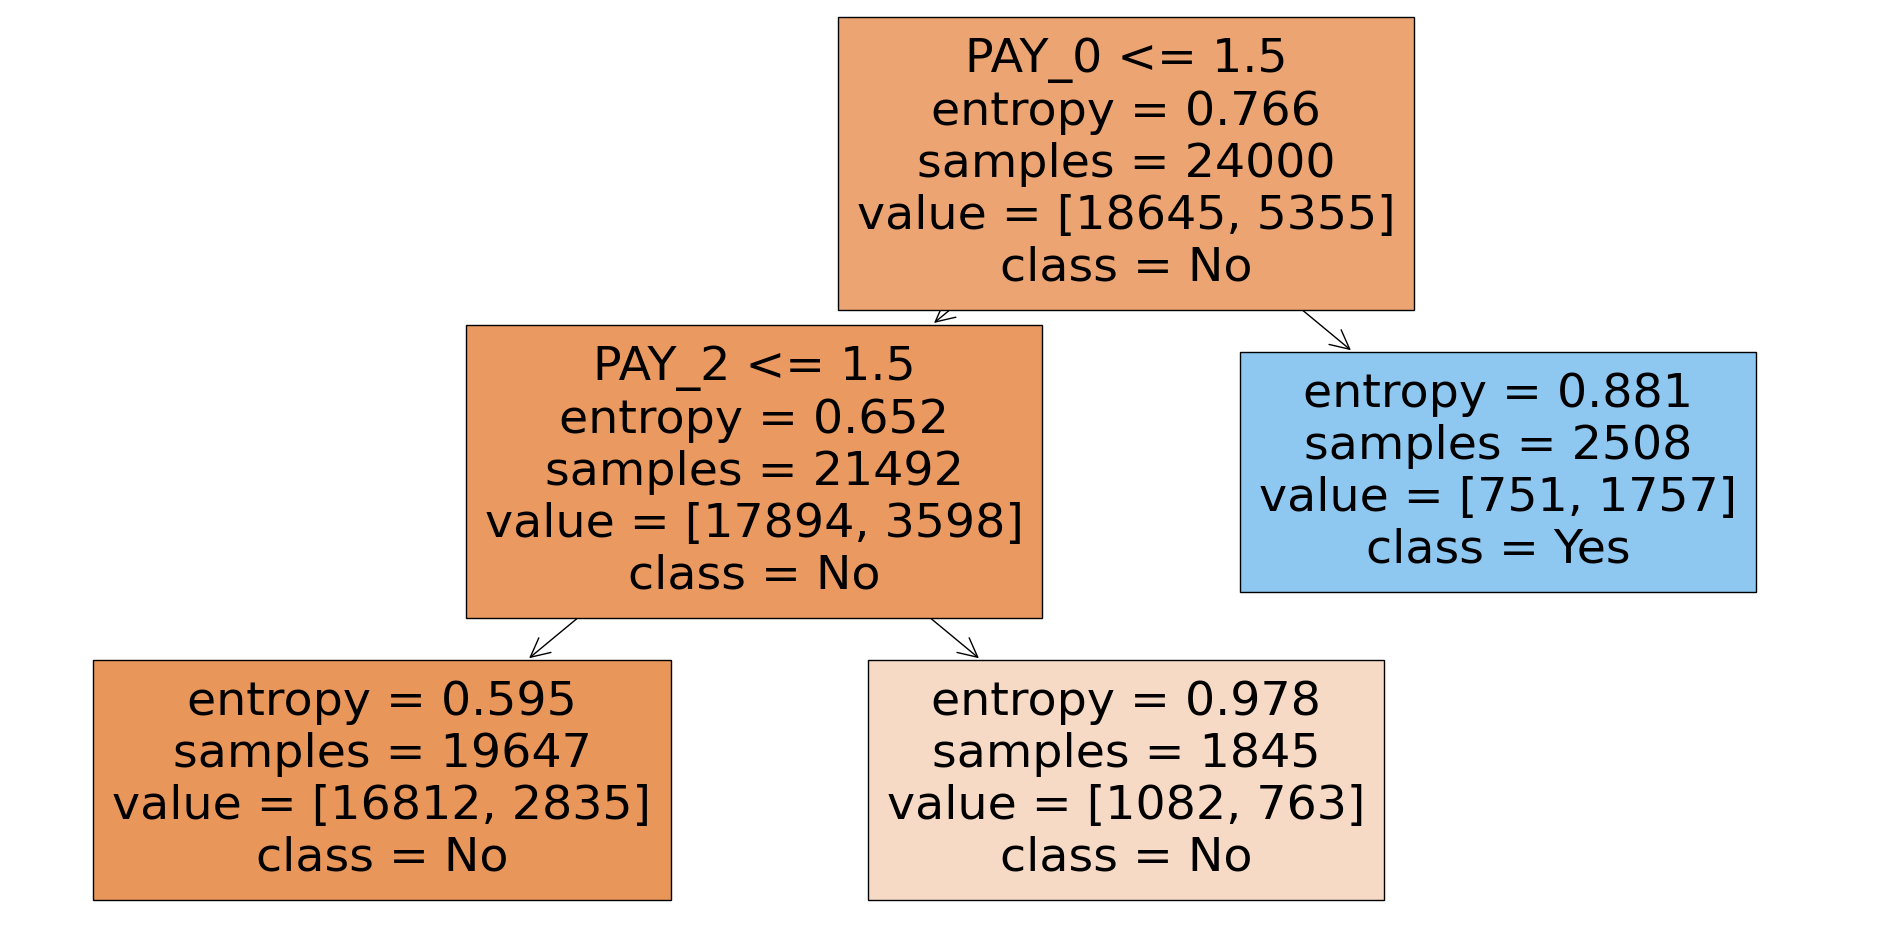

In [35]:
plt.figure(figsize=(24,12))
plot_tree(pruned_tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [36]:
# Predictions on the test set
y_pred_1 = model.predict(X_test)

# Compute accuracy, sensitivity, and specificity
accuracy_score(y_test, y_pred_1)

0.7333333333333333

In [37]:
# Predictions on the test set
y_pred_2 = pruned_tree.predict(X_test)

# Compute accuracy, sensitivity, and specificity
accuracy_score(y_test, y_pred_2)

0.8228333333333333

In [38]:
pd.crosstab(y_test, y_pred_1)

col_0,0,1
default payment next month,,
0,3874,845
1,755,526


In [39]:
pd.crosstab(y_test, y_pred_2)

col_0,0,1
default payment next month,,
0,4517,202
1,861,420


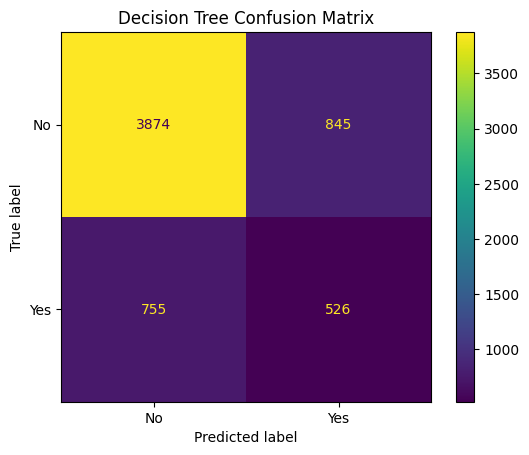

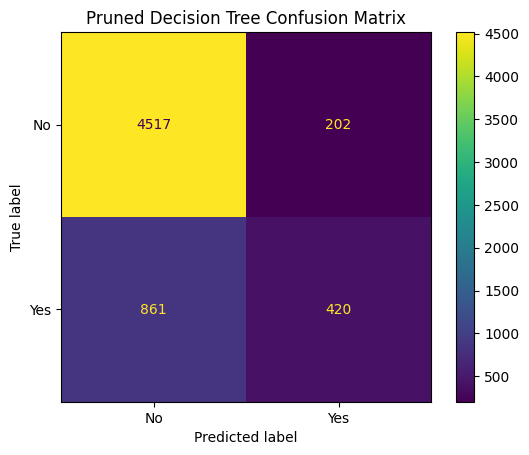

In [45]:
from sklearn import metrics

confusion_matrix_dTree = metrics.confusion_matrix(y_test, y_pred_1)
confusion_matrix_PrunedDtree = metrics.confusion_matrix(y_test, y_pred_2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dTree, display_labels = ['No', 'Yes'])
cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_PrunedDtree, display_labels = ['No', 'Yes'])

cm_display.plot()
cm_display.ax_.set_title('Decision Tree Confusion Matrix')
plt.show()

cm_display2.plot()
cm_display2.ax_.set_title('Pruned Decision Tree Confusion Matrix')
plt.show()

In [46]:
print("Sensitvity and specificity tells us that the model is able to identify actual positive cases by minimizing false negatives")
print("Specificy tells us that the model is able to identify actual negative cases by minimizing false positives")

Sensitvity and specificity tells us that the model is able to identify actual positive cases by minimizing false negatives
Specificy tells us that the model is able to identify actual negative cases by minimizing false positives


In [47]:
print("The decision rules learned is that if a payment has not been delayed for a month and half or less then the payment will not be defaulted on.")

The decision rules learned is that if a payment has not been delayed for a month and half or less then the payment will not be defaulted on.
